### Uniform FP:

In [ ]:
import h5py
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/false_positive'

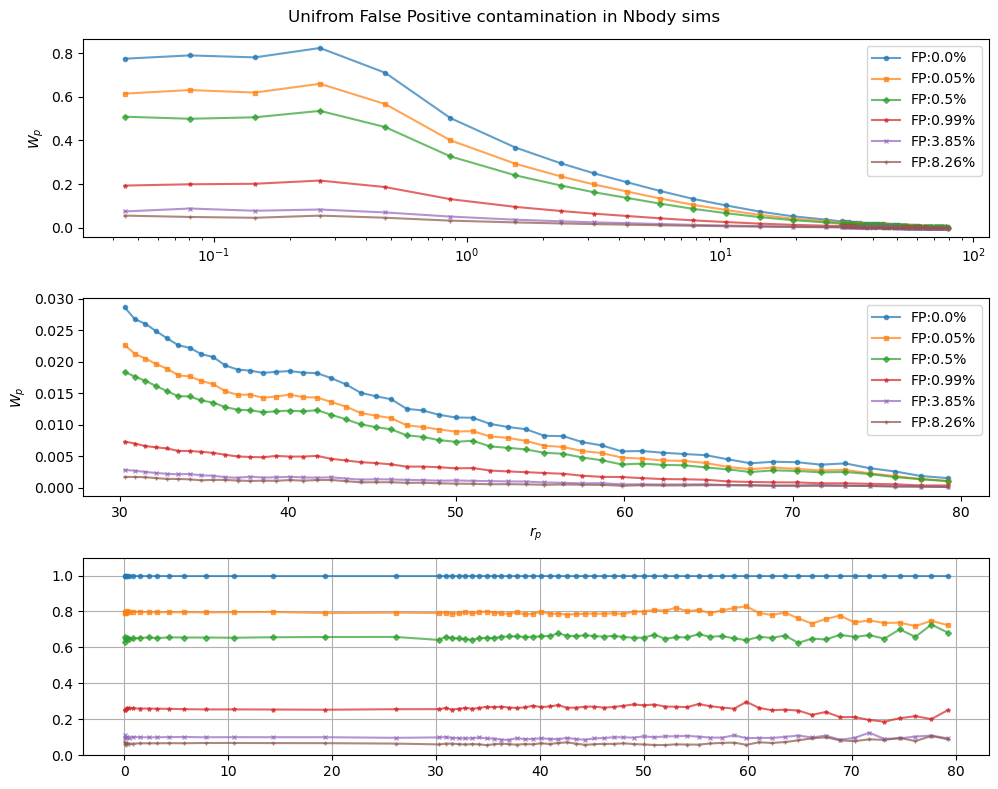

In [9]:
fig, ax = plt.subplots(3,1, figsize=(10,8))

save_files = ['wp_fof_uniform_fp_0percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_0.5percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_1percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_4percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_9percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'wp_fof_uniform_fp_12percent_cosmo_10p_Box250_Part750_0000.hdf5'
              #'wp_fof_uniform_fp_15percent_cosmo_10p_Box250_Part750_0000.hdf5,
              #'wp_fof_uniform_fp_25percent_cosmo_10p_Box250_Part750_0000.hdf5',
              #'wp_fof_uniform_fp_40percent_cosmo_10p_Box250_Part750_0000.hdf5',
              #'wp_fof_uniform_fp_80percent_cosmo_10p_Box250_Part750_0000.hdf5'
              ]
ratio = [0, 0.0005, 0.005, 0.01,  0.04, 0.09, 0.12,  0.15, 0.25, 0.4,  0.8]
fps = [ np.round(100*r/(1+r), 2) for r in ratio]
markers = ['o', 's', 'D', '*', 'x', '+', 'v', '^', '<', '>', 'p']

for i, save_file in enumerate(save_files):
    with h5py.File(op.join(save_dir, save_file), 'r') as f:
        wp = np.mean(f['corr'][:], axis=1)
        rp = f['r'][:]/2
        if i==0:
            wp_0 = wp
        label = f'FP:{fps[i]}%'
        ax[0].plot(rp, wp, label=label, marker=markers[i], markersize=3, alpha=0.7)
        ind = np.where(rp>30)[0]
        ax[1].plot(rp[ind], wp[ind], label=label, marker=markers[i], markersize=3, alpha=0.7)

        ax[2].plot(rp, wp/wp_0, label=label, marker=markers[i], markersize=3, alpha=0.7)
        

ax[0].set_xscale('log')
ax[0].legend()
ax[1].legend()
ax[0].set_ylabel(r'$W_p$')
ax[1].set_ylabel(r'$W_p$')
ax[1].set_xlabel(r'$r_p$')
ax[2].grid()
ax[2].set_ylim((0,1.1))
fig.suptitle('Unifrom False Positive contamination in Nbody sims')
fig.tight_layout()
fig.savefig(op.join(save_dir, 'wp_fof_cosmo_10p_Box250_Part750_0000.png'))

## Power:

/tmp/ipykernel_171043/1787295527.py:21: RuntimeWarning: invalid value encountered in divide
  ax[2].plot(k, pk/pk_0, label=label, marker=markers[i], markersize=3, alpha=0.7)


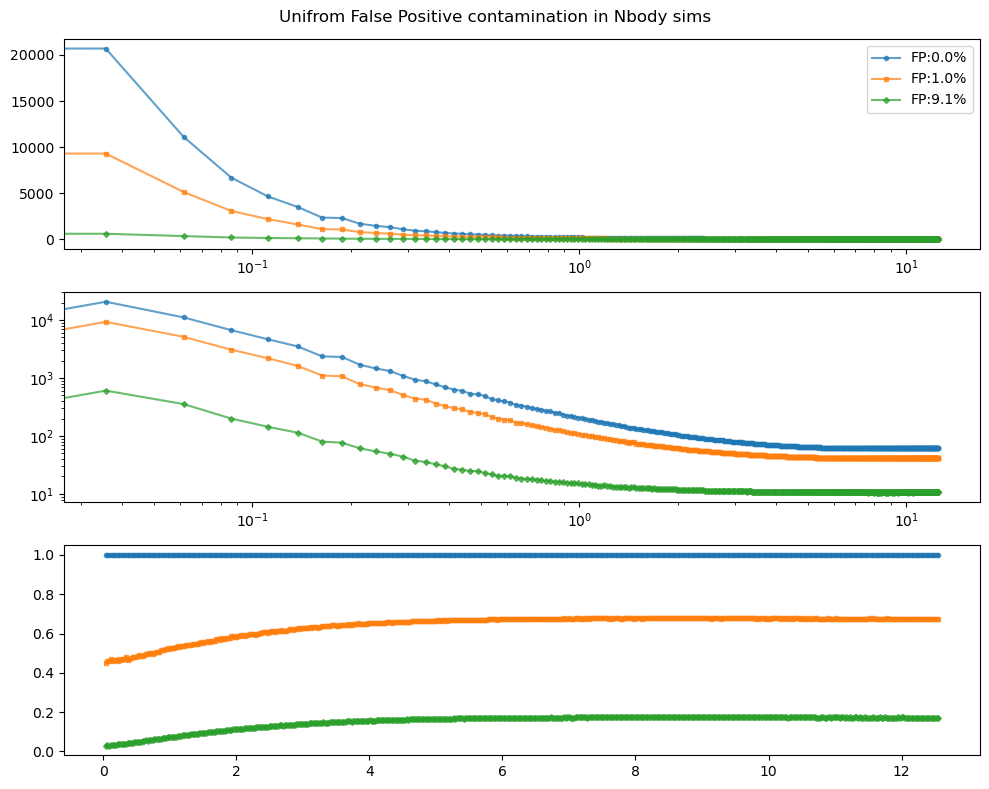

In [7]:
fig, ax = plt.subplots(3,1, figsize=(10,8))

save_files = ['power_fof_uniform_fp_0percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'power_fof_uniform_fp_1percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'power_fof_uniform_fp_10percent_cosmo_10p_Box250_Part750_0000.hdf5',
              ]
ratio = [0, 0.01, 0.1]
fps = [ np.round(100*r/(1+r), 1) for r in ratio]
markers = ['o', 's', 'D', '*', 'x', '+', 'v', '^', '<', '>', 'p']

for i, save_file in enumerate(save_files):
    with h5py.File(op.join(save_dir, save_file), 'r') as f:
        pk = f['power'][:]
        k = f['k'][:]
        if i==0:
            pk_0 = pk
        label = f'FP:{fps[i]}%'
        ax[0].plot(k, pk, label=label, marker=markers[i], markersize=3, alpha=0.7)
        #ind = np.where(rp>30)[0]
        ax[1].plot(k, pk, label=label, marker=markers[i], markersize=3, alpha=0.7)
        ax[2].plot(k, pk/pk_0, label=label, marker=markers[i], markersize=3, alpha=0.7)

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].legend()
fig.suptitle('Unifrom False Positive contamination in Nbody sims')
fig.tight_layout()

In [2]:
import h5py
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/check_false_positive'

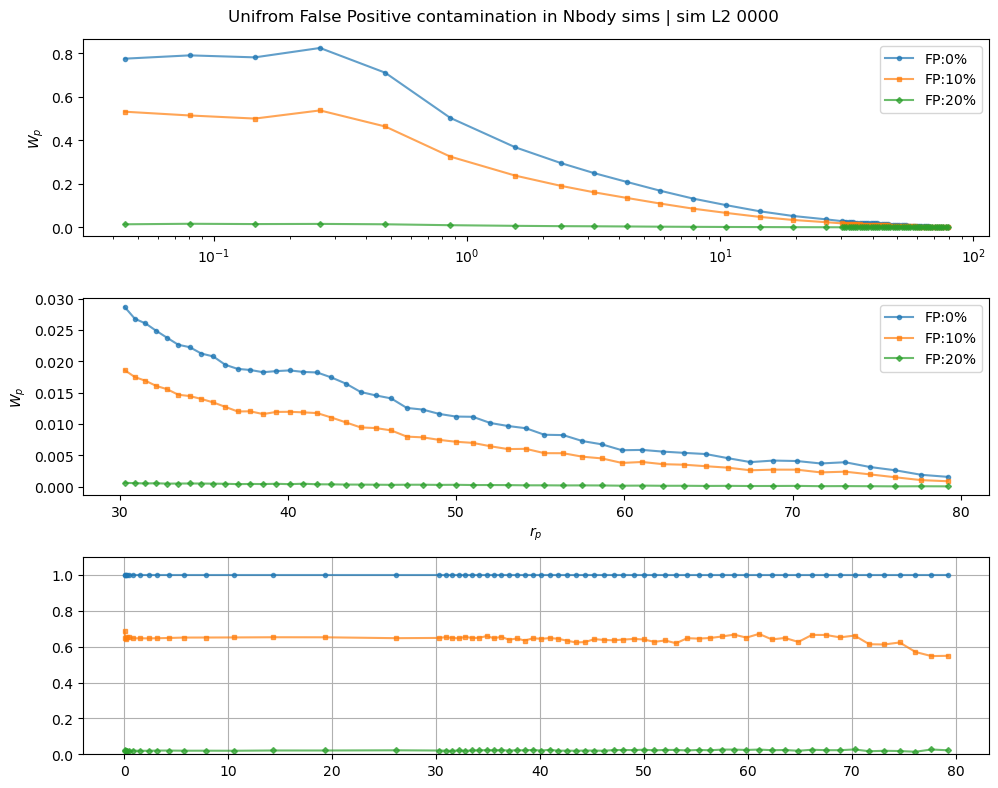

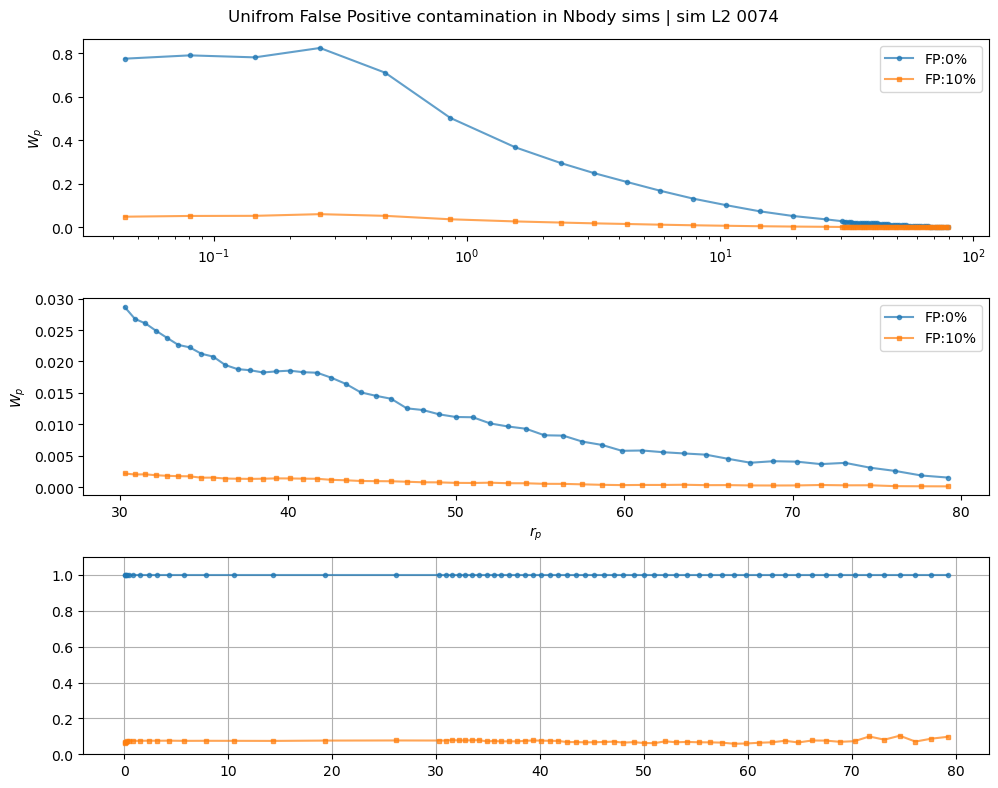

In [7]:
def plot_Corr(sim_num='0000', fps = [0, 10, 20]):
    fig, ax = plt.subplots(3,1, figsize=(10,8))
    save_files= [f'wp_fof_uniform_{str(round(fps))}_percent_cosmo_10p_Box250_Part750_{sim_num}.hdf5' for fps in fps]
    markers = ['o', 's', 'D', '*', 'x', '+', 'v', '^', '<', '>', 'p']

    for i, save_file in enumerate(save_files):
        with h5py.File(op.join(save_dir, save_file), 'r') as f:
            wp = np.mean(f['corr'][:], axis=1)
            rp = f['r'][:]/2
            if i==0:
                wp_0 = wp
            label = f'FP:{fps[i]}%'
            ax[0].plot(rp, wp, label=label, marker=markers[i], markersize=3, alpha=0.7)
            ind = np.where(rp>30)[0]
            ax[1].plot(rp[ind], wp[ind], label=label, marker=markers[i], markersize=3, alpha=0.7)

            ax[2].plot(rp, wp/wp_0, label=label, marker=markers[i], markersize=3, alpha=0.7)
            

    ax[0].set_xscale('log')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_ylabel(r'$W_p$')
    ax[1].set_ylabel(r'$W_p$')
    ax[1].set_xlabel(r'$r_p$')
    ax[2].grid()
    ax[2].set_ylim((0,1.1))
    fig.suptitle(f'Unifrom False Positive contamination in Nbody sims | sim L2 {sim_num}')
    fig.tight_layout()

plot_Corr('0000')
plot_Corr('0074', fps=[0, 10])

/tmp/ipykernel_171043/1785391722.py:20: RuntimeWarning: invalid value encountered in divide
  ax[2].plot(k, pk/pk_0, label=label, marker=markers[i], markersize=3, alpha=0.7)


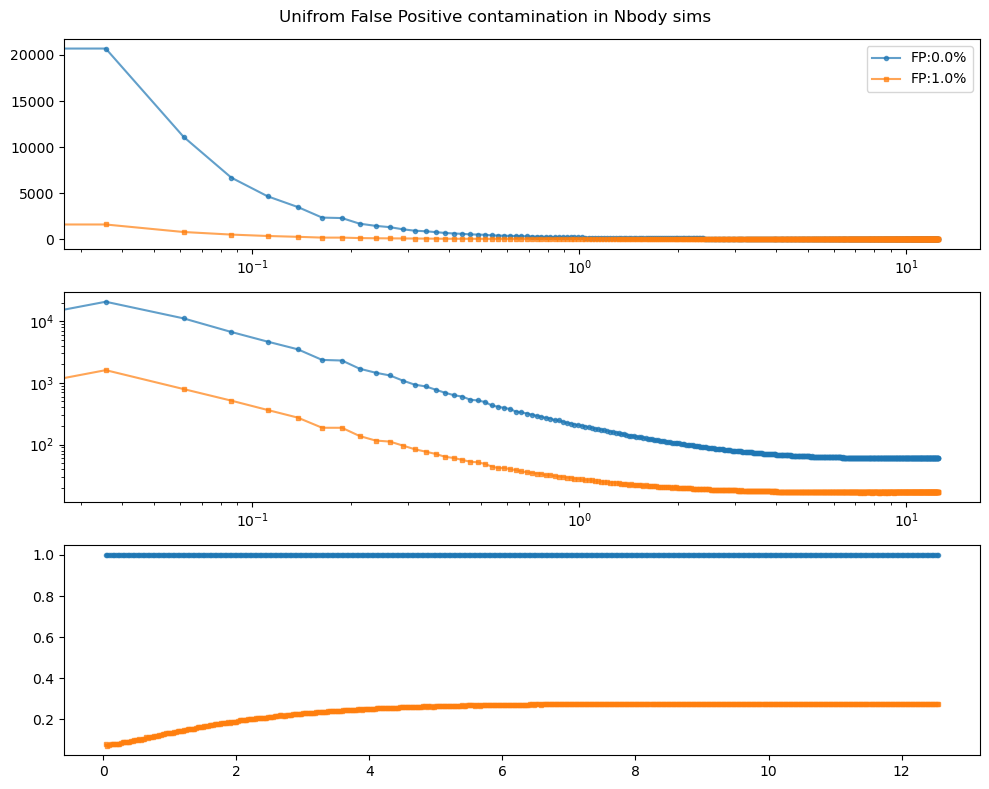

In [24]:
fig, ax = plt.subplots(3,1, figsize=(10,8))

save_files = ['power_fof_uniform_0_percent_cosmo_10p_Box250_Part750_0000.hdf5',
              'power_fof_uniform_10_percent_cosmo_10p_Box250_Part750_0000.hdf5',
              ]
ratio = [0, 0.01, 0.1]
fps = [ np.round(100*r/(1+r), 1) for r in ratio]
markers = ['o', 's', 'D', '*', 'x', '+', 'v', '^', '<', '>', 'p']

for i, save_file in enumerate(save_files):
    with h5py.File(op.join(save_dir, save_file), 'r') as f:
        pk = f['power'][:]
        k = f['k'][:]
        if i==0:
            pk_0 = pk
        label = f'FP:{fps[i]}%'
        ax[0].plot(k, pk, label=label, marker=markers[i], markersize=3, alpha=0.7)
        #ind = np.where(rp>30)[0]
        ax[1].plot(k, pk, label=label, marker=markers[i], markersize=3, alpha=0.7)
        ax[2].plot(k, pk/pk_0, label=label, marker=markers[i], markersize=3, alpha=0.7)

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[0].legend()
fig.suptitle('Unifrom False Positive contamination in Nbody sims')
fig.tight_layout()